# PDF and Images Content Extraction for Large Language Models

In [10]:
#!pip install -U pypdfium2

In [11]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [12]:
def convert_pdf_to_images(file_path, scale=300/72):
    
    pdf_file = pdfium.PdfDocument(file_path)  
    page_indices = [i for i in range(len(pdf_file))]
    
    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices, 
        scale = scale,
    )
    
    list_final_images = [] 
    
    for i, image in zip(page_indices, renderer):
        
        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))
    
    return list_final_images

In [13]:
def display_images(list_dict_final_images):
    
    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [14]:
convert_pdf_to_images = convert_pdf_to_images('Experimentation_file.pdf')

In [16]:
#convert_pdf_to_images

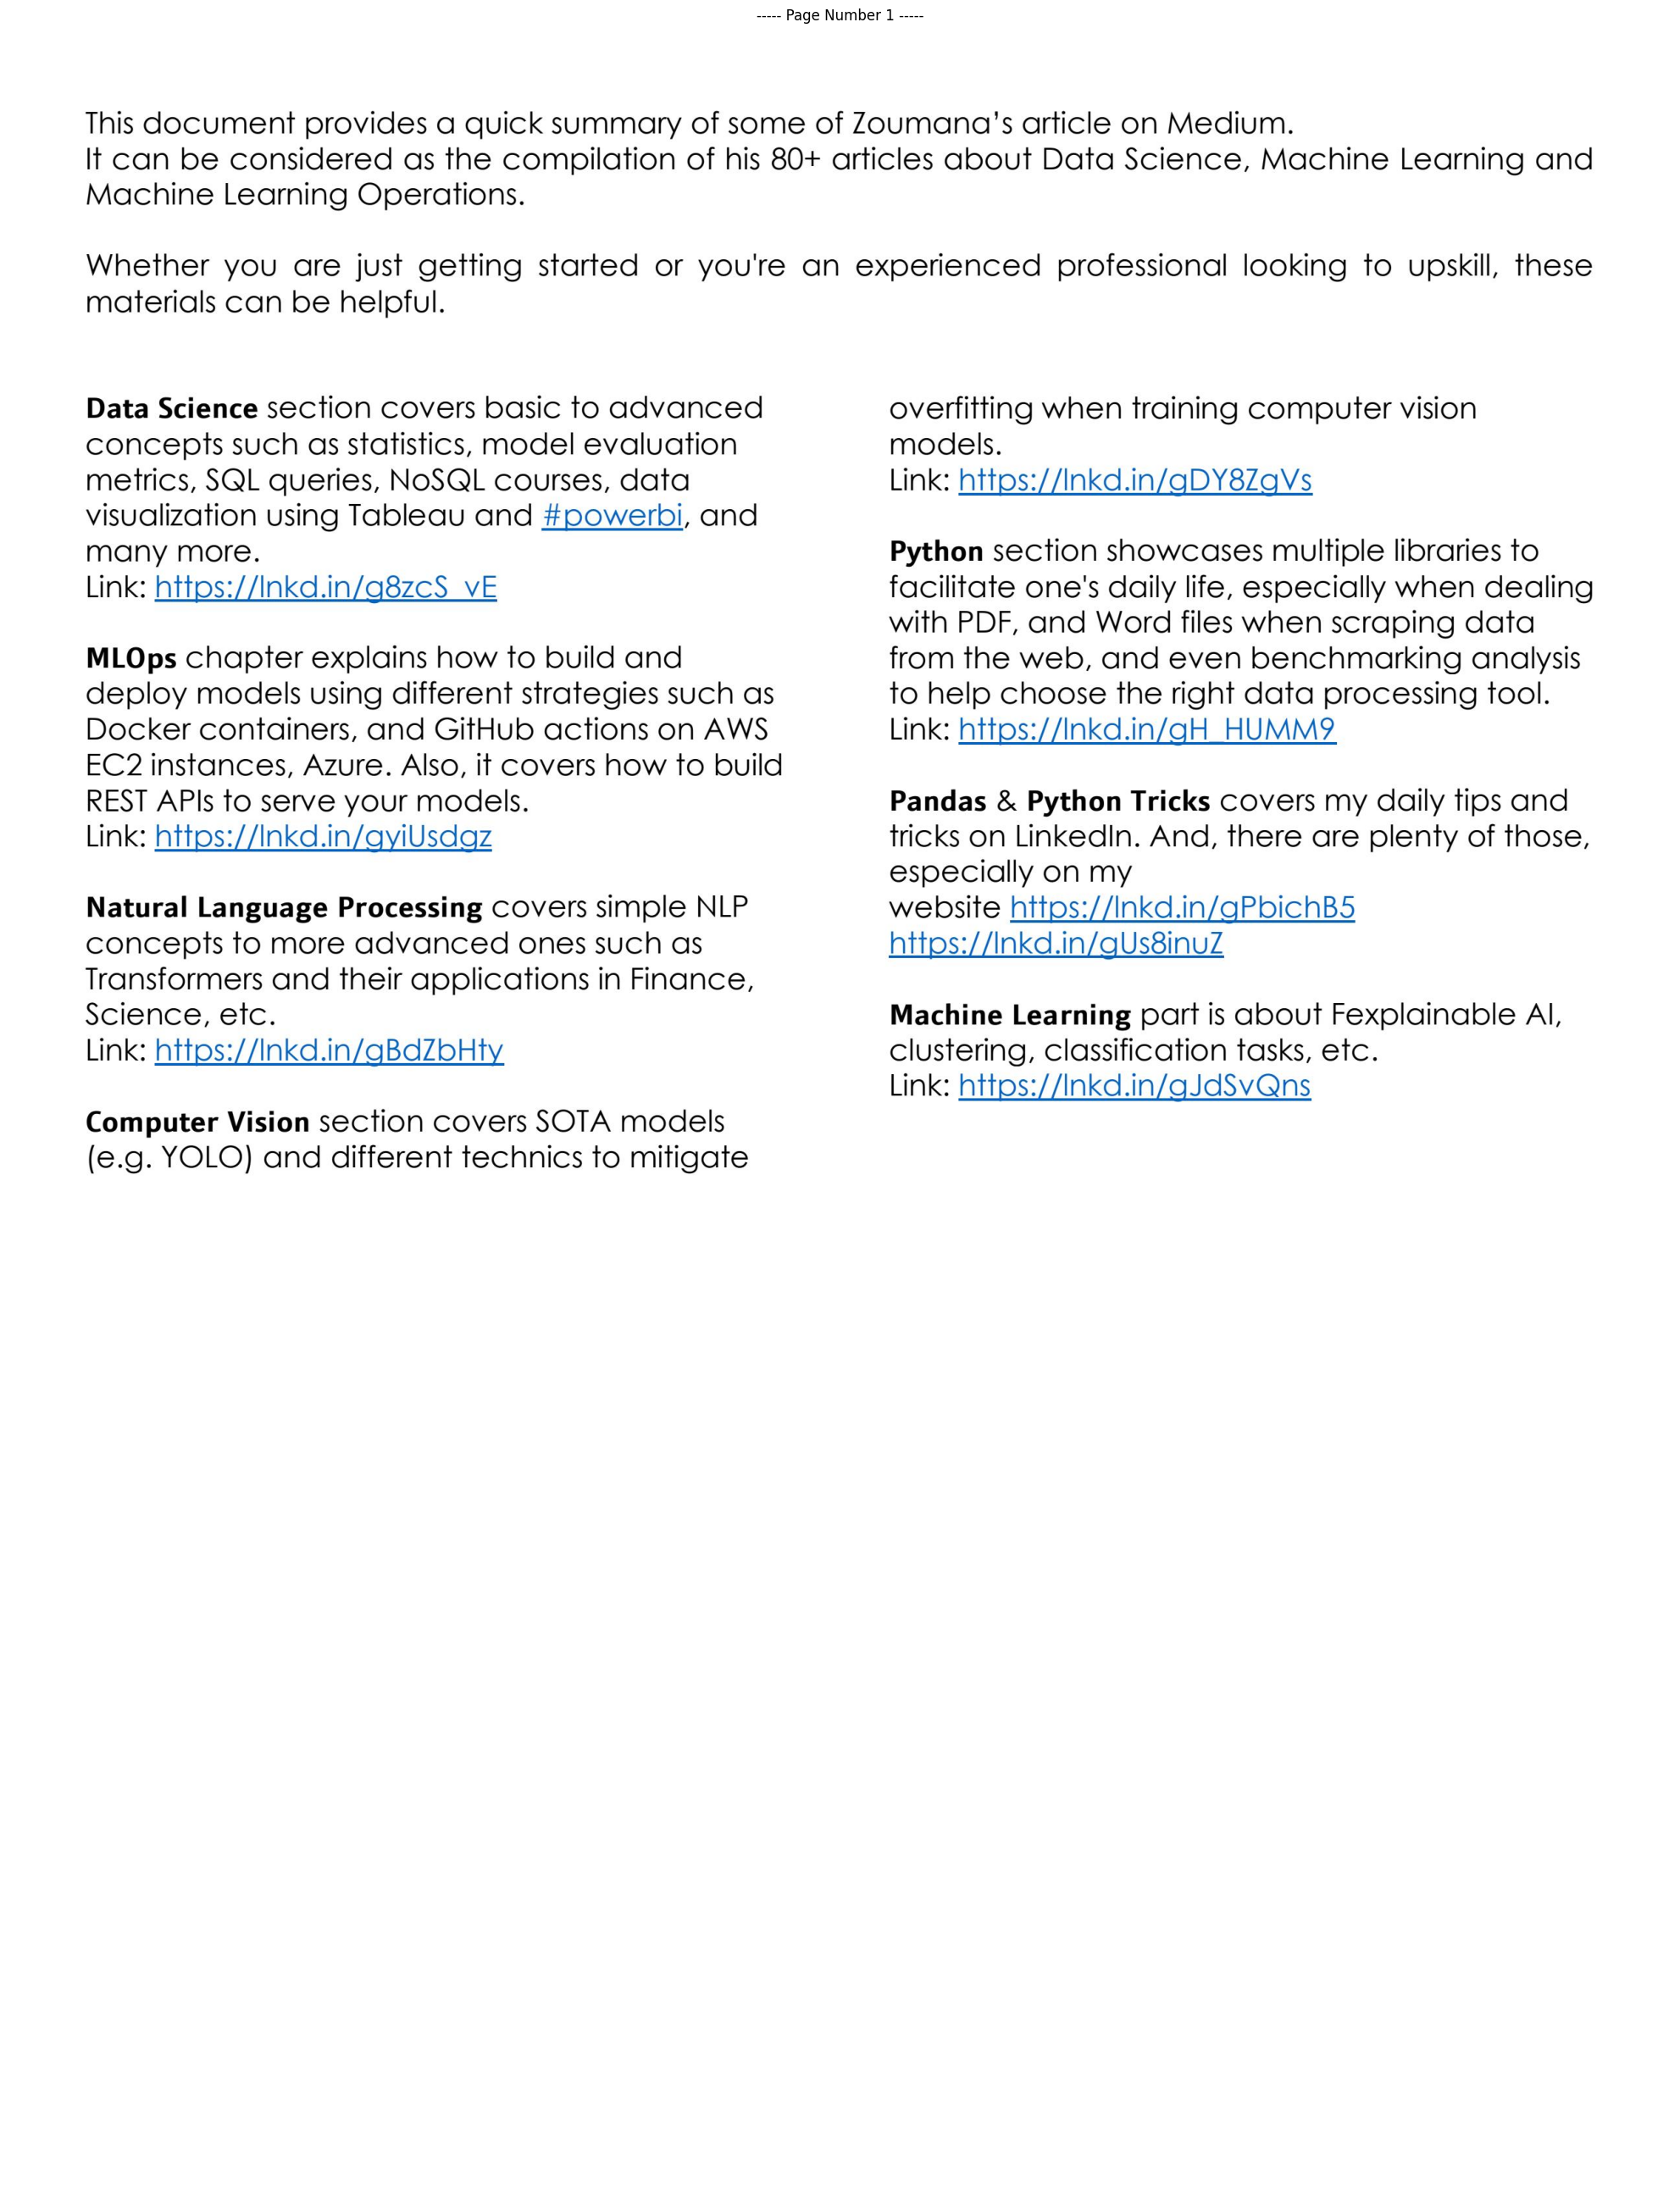

In [17]:
display_images(convert_pdf_to_images)

## PyTesseract

In [18]:
#!pip install pytesseract

In [19]:
from pytesseract import image_to_string 

In [21]:
def extract_text_with_pytesseract(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(image))
        image_content.append(raw_text)
    
    return "\n".join(image_content)

In [22]:
text_with_pytesseract = extract_text_with_pytesseract(convert_pdf_to_images)

print(text_with_pytesseract)

This document provides a quick summary of some of Zoumana’s article on Medium.
It can be considered as the compilation of his 80+ articles about Data Science, Machine Learning and

Machine Learning Operations.

Whether you are just getting started or you're an experienced professional looking to upskill, these

materials can be helpful.

Data Science section covers basic to advanced
concepts such as statistics, model evaluation
metrics, SQL queries, NoSQL courses, data
visualization using Tableau and #powerbi, and
many more.

Link: httos://Inkd.in/g8zcS_vE

MLOps chapter explains how to build and
deploy models using different strategies such as
Docker containers, and GitHub actions on AWS
EC2 instances, Azure. Also, it covers how to build
REST APIs to serve your models.

Link: httos://Inkd.in/gyiUsdgz

Natural Language Processing Covers simple NLP
concepts to more advanced ones such as
Transformers and their applications in Finance,
Science, etc.

Link: httos://Inkd.in/gBdZbHty

Comput

## EasyOCR

In [23]:
#!pip install easyocr

from easyocr import Reader

# Load model for the English language
language_reader = Reader(["en"])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [26]:
def extract_text_with_easyocr(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])
                       
        image_content.append(raw_text)
    
    return "\n".join(image_content)

In [27]:
text_with_easy_ocr = extract_text_with_easyocr(convert_pdf_to_images)
print(text_with_easy_ocr)

This document provides a quick summary of some of Zoumana's article on Medium
It can be considered as the compilation of his 8O+ articles about Data Science, Machine Learning and
Machine Learning Operations:
Whether YOU
are just getting started
or
youre
an
experienced professional looking to upskill, these
materials can be helpful:
Data Science section covers basic to advanced
overfitting when training computer vision
concepts such as statistics, model evaluation
models.
metrics, SQL queries, NoSQL courses, data
Link: https LInkdinIgDY8ZgVs
visualization Using Tableau and #powerbi, and
many more_
Python section showcases multiple libraries to
Link: https LInkdin/a8zcS_vE
facilitate one's daily life , especially when dealing
with PDF, and Word files when scraping data
MLOps chapter explains how to build and
from the web, and even benchmarking analysis
deploy models Using different strategies such as
to help choose the right data processing tool:.
Docker containers, and GitHub actions on

## PyPDF

In [28]:
#!pip install PyPDF2

In [32]:
from PyPDF2 import PdfReader

In [33]:
def extract_text_with_pyPDF(PDF_File):

    pdf_reader = PdfReader(PDF_File)
    
    raw_text = ''

    for i, page in enumerate(pdf_reader.pages):
        
        text = page.extract_text()
        if text:
            raw_text += text

    return raw_text

In [ ]:
text_with_pyPDF = extract_text_with_pyPDF("Experimentation_file.pdf")
print(text_with_pyPDF)

## LangChain

In [3]:
!pip install langchain

In [62]:
from langchain.document_loaders.image import UnstructuredImageLoader

def extract_text_with_langchain_image(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        loader = UnstructuredImageLoader(image)
        data = loader.load()
        raw_text = data[index].page_content
                       
        image_content.append(raw_text)
    
    return "\n".join(image_content)

In [ ]:
text_with_langchain_image = extract_text_with_langchain_image(convert_pdf_to_images)
print(text_with_langchain_image)

In [66]:
from langchain.document_loaders import UnstructuredFileLoader

def extract_text_with_langchain_pdf(pdf_file):
    
    loader = UnstructuredFileLoader(pdf_file)
    documents = loader.load()
    pdf_pages_content = '\n'.join(doc.page_content for doc in documents)
    
    return pdf_pages_content

In [ ]:
text_with_langchain_files = extract_text_with_langchain_pdf("Experimentation_file.pdf")
print(text_with_langchain_files)